Sine training example for FANN2
--
APPLICATIONS: TOY EXAMPLES
Regression

This is not space science (http://nxn.se/)

In [3]:
%matplotlib inline

from fann2 import libfann #the neural network library

import numpy as np
import pandas as pd
import scipy as sp
import random
from time import time
from math import pi, sin, cos
#for the visualization:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

As our first toy example, we consider a simple regression problem. We generate 200 points randomly in the range $x ∈ [−5π, 5π]$, for which we evaluate the ramped sinc function, $$y(x)=\frac{sin(x)}{x} +0.04x,$$

https://www.overleaf.com

In [4]:
def yx(x):
    return (sin(x)/x)+0.04*x

def generate_data(ff, points, min, max):
    x = []
    y = []
    step = (max - min) / points
    for i in range(points):
        x.append([min])
        y.append([ff(min)])
        min = min + step
    return (x,y)

def generate_random_data(ff, points, min, max):
    """
    We generate N points randomly in the range x
    """
    x = []
    y = []
    for i in range(points):
        r = random.uniform(min, max)
        x.append([r])
        y.append([ff(r)])
    return (x,y)

def gaussian_noise(x, v):
    """
    Gaussian noise with zero mean and a standard deviation
    of 0.05. The addition of noise makes the regression problem
    more difficult and prevents any exact solution being possible.
    """
    new_x = []
    for i in range(len(x)):
        new_x.append([x[i][0] + random.uniform(-v, v)])
    return new_x

In [5]:
def divided_randomly_training_validation(input_data, target_data):
    """
    To perform the regression, the N data items (x, y) are divided
    randomly into 70% items for training and 30% for validation.
    """
    len_data = len(input_data)
    p = int((len_data * 70)/100)
    #print(p)
    input_data_train = input_data[:p]
    target_data_train = target_data[:p]
    input_data_test = input_data[p:]
    target_data_test = target_data[p:]
    return (input_data_train, target_data_train, input_data_test, target_data_test)

In [6]:
input_data, target_data = generate_random_data(yx, 200, -5.*pi, 5.*pi)
noise_target_data = gaussian_noise(target_data, 0.05)
input_data_train, target_data_train, input_data_test, target_data_test = \
    divided_randomly_training_validation(input_data, noise_target_data)

train_data = libfann.training_data()
test_data = libfann.training_data()

train_data.set_train_data(input_data_train, target_data_train)
train_data.save_train("sin.train")

test_data.set_train_data(input_data_test, target_data_test)
test_data.save_train("sin.test")

True

In [7]:
while True:
    ann = libfann.neural_net()
    ann.create_standard_array([1, 11, 9, 3, 1])

    ann.set_learning_rate(0.7)
    #ann.randomize_weights()
    ann.set_activation_function_output(libfann.SIGMOID_SYMMETRIC_STEPWISE)
    #ann.set_activation_function_output(libfann.LINEAR)
    ann.set_activation_function_output(libfann.SIGMOID_SYMMETRIC_STEPWISE)
    max_iterations = 80000
    iterations_between_reports =  8000
    desired_error =  0.001
    t0 = time()
    ann.train_on_data(train_data, max_iterations, iterations_between_reports, desired_error)
    print('MSE= ', ann.get_MSE())

    ann.print_parameters() # print to terminal
    ann.print_connections()
    ann.save("sin_float.net")
    t1 = time()
    print( 'times: %s s' %(t1-t0))
    if ann.get_MSE() <= desired_error:
        break
print("Done.")        

MSE=  0.0009996105517659868
times: 0.21633219718933105 s
Done.


In [8]:
run_train = []
for i in range(len(input_data_train)):
    run_train.append(ann.run([input_data_train[i][0]]))

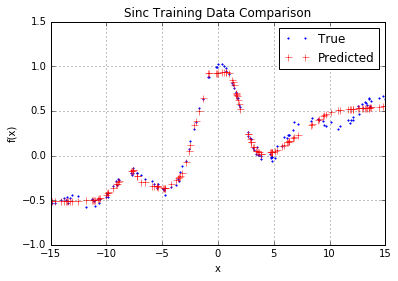

In [9]:
plt.plot(input_data_train, target_data_train, "b.", markersize=3)
plt.plot(input_data_train, run_train, 'r+', markersize=7)
plt.grid()
plt.title("Sinc Training Data Comparison")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(-15,15)
plt.ylim(-1,1.5)
plt.legend(["True", "Predicted"])

In [10]:
run_test = []
for i in range(len(input_data_test)):
    run_test.append(ann.run([input_data_test[i][0]]))

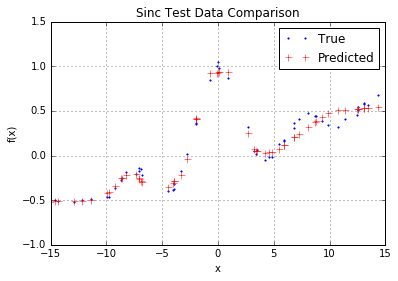

In [11]:
plt.plot(input_data_test, target_data_test, "b.", markersize=3)
plt.plot(input_data_test, run_test, 'r+', markersize=7)
plt.grid()
plt.title("Sinc Test Data Comparison")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(-15,15)
plt.ylim(-1,1.5)
plt.legend(["True", "Predicted"])

In [12]:
diff_train = []
diff_test = []

for i in range(len(input_data_train)):
    diff_train.append(target_data_train[i][0] - run_train[i][0])
print("diff_train= ", min(diff_train), max(diff_train)) 

for i in range(len(input_data_test)):
    diff_test.append(target_data_test[i][0] - run_test[i][0])
print(min(diff_test), max(diff_test)) 

delta_x_train = np.linspace(min(diff_train), max(diff_train), 21).tolist() #, len(input_data_train))
delta_x_test = np.linspace(min(diff_test), max(diff_test), 21).tolist() #, len(input_data_test)) 

#(delta_x_train, delta_x_test)

diff_train=  -0.21479454949239107 0.16799006918665885
-0.1892552780063173 0.17283565734384532


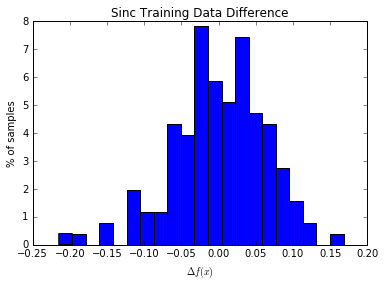

In [13]:
# Formatting & Tweaking Our Histogram
plt.hist(diff_train, bins=21, normed=True) #,  label='Uniform')
plt.title("Sinc Training Data Difference")
plt.ylabel("% of samples")
plt.xlabel("$\Delta f(x)$")
#plt.legend()
#plt.show()
# Сколько процентов составляет число 23 от числа 115 ?
# Нужно: 23*100/115 = 20%

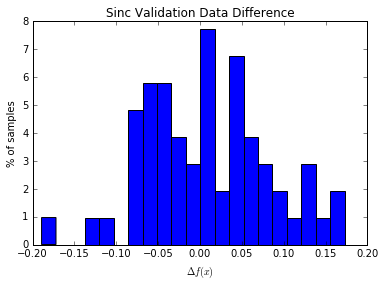

In [14]:
# Formatting & Tweaking Our Histogram
plt.hist(diff_test, bins=21, normed=True) #,  label='Uniform')
plt.title("Sinc Validation Data Difference")
plt.ylabel("% of samples")
plt.xlabel("$\Delta f(x)$")

Tips
--
* NeuralNetTools: Visualization and Analysis Tools for Neural Networks https://cran.r-project.org/web/packages/NeuralNetTools/
* http://feltes.ch/index.php/2015/10/03/classifing-mnist-dataset-with-fast-artificial-neural-network-library-fann-in-python/
* http://arxiv.org/pdf/1309.0790.pdf
* http://koldunov.net/?p=384#more-384
* http://pdfcrowd.com/

* http://matplotlib.org/examples/pylab_examples/multiple_yaxis_with_spines.html multiple_yaxis_with_spines.py